In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA  # Import from the updated module
from statsmodels.tsa.stattools import adfuller

In [2]:

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [4]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [5]:
#get data
series = pd.read_csv(r"D:\Time series analysis\catfish.csv", parse_dates=[0], index_col=0, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

C:\Users\ASHU\AppData\Local\Temp\ipykernel_21256\539155647.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv(r"D:\Time series analysis\catfish.csv", parse_dates=[0], index_col=0, date_parser=parser)


In [6]:
series.squeeze()

Date
2004-03-01   -1067.0
2004-04-01   -4131.0
2004-05-01    3543.0
2004-06-01     401.0
2004-07-01    -405.0
               ...  
2012-08-01     353.0
2012-09-01   -2186.0
2012-10-01    1393.0
2012-11-01    -816.0
2012-12-01    -193.0
Freq: MS, Name: Total, Length: 106, dtype: float64

In [7]:
#check stationarity
perform_adf_test(series)


ADF Statistic: -7.162321
p-value: 0.000000


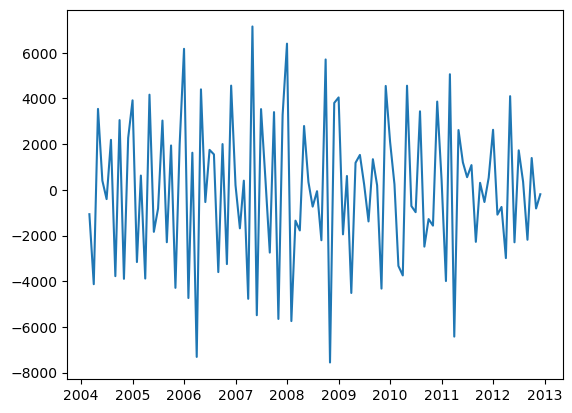

In [8]:

plt.plot(series)

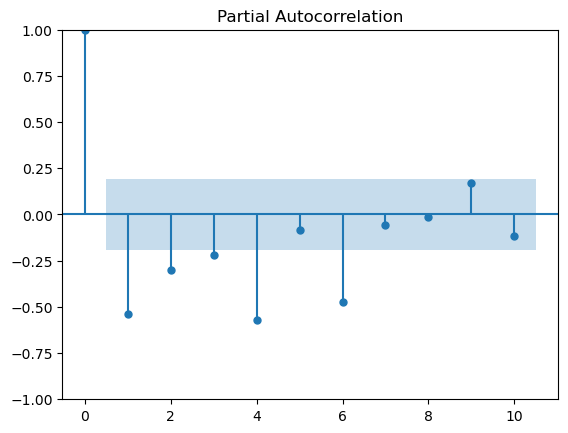

In [9]:
plot_pacf(series, lags=10)
plt.show()

## Either AR(1), AR(4), AR(6), or AR(10)


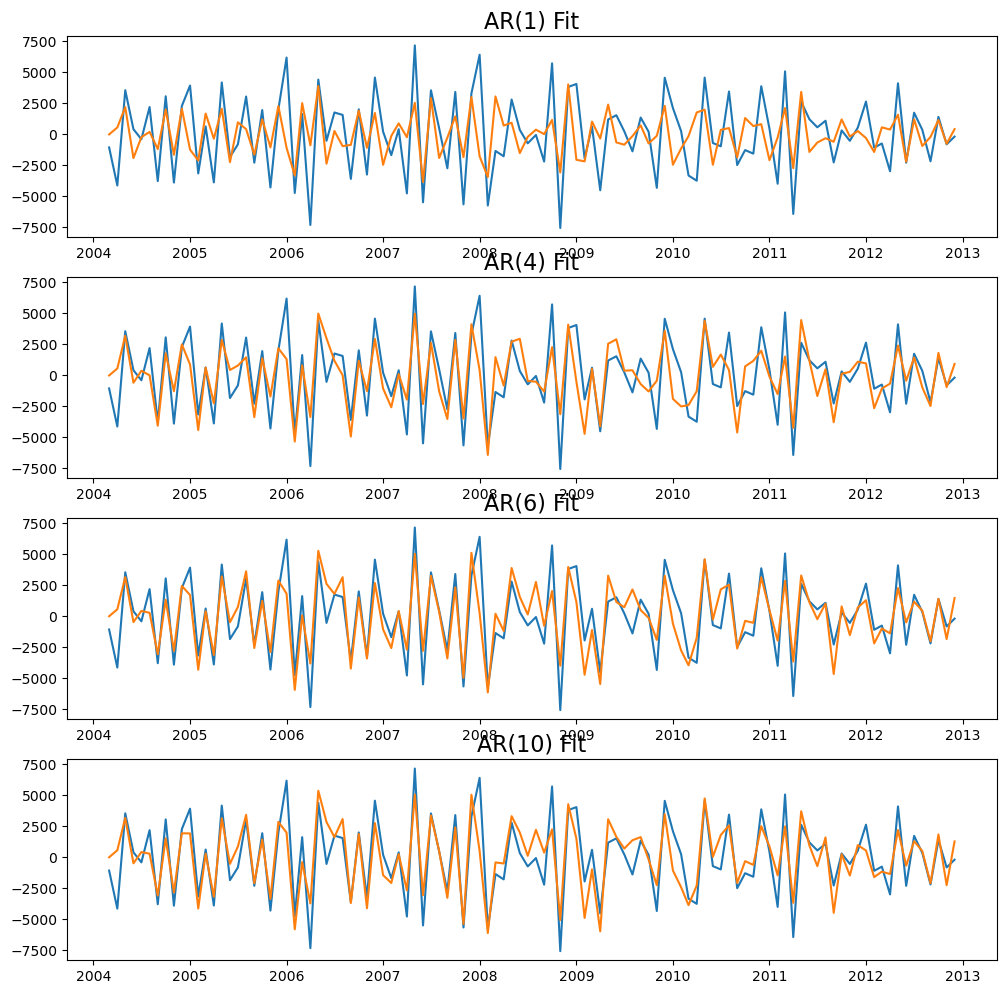

In [10]:
plt.figure(figsize=(12,12))

ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)


# Each model has:
# a log likelihood (l)
# a number of parameters (k)
# a number of samples used for fitting (n)
# AIC = 2k- 2l
# Lower AIC via higher log likelihood or less parameters
# BIC = ln(n)k- 2l
# Lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [11]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.860621744531
AIC for AR(4): 1927.6099852660273
AIC for AR(6): 1899.6497441291747
AIC for AR(10): 1902.3765449841069



# Based on AIC criteria, pick AR(6)

In [12]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8509390268673
BIC for AR(4): 1943.5906198306996
BIC for AR(6): 1920.9572568820713
BIC for AR(10): 1934.3378141134517
